### Instructor Demo: Coin Flip Simulation

This program executes `n` number of simulations of flipping a coin 10 times. Results are then saved to a DataFrame to calculate the frequency distribution and corresponding probability distribution of the coin landing on heads.

In [1]:
# Import libraries and dependencies
from numpy import random
import pandas as pd

%matplotlib inline

In [2]:
# Set the random seed
random.seed(3)

### Perform the Monte Carlo Simulation and Create Pandas DataFrame From Results

In [3]:
# Set number of simulations and coin flips
num_simulations = 1000
num_flips = 10

# Set a list object acting as a coin: heads or tails
coin = ["heads", "tails"]

# Set probability of events
probability = [0.5, 0.5]

# Create an empty DataFrame to hold simulation results
monte_carlo = pd.DataFrame()

# Run n number of simulations
for n in range(num_simulations):

    # Print simulation iteration
    # print(f"Running Simulation {n+1}...")
    
    # Set an empty list to hold flip results
    flips = []

    # Flip the coin several times
    for i in range(num_flips):
        
        # Random int: 0 or 1
        coin_flip = random.choice(coin, p=probability)
        
        # Print flip result
        # print(f"  Flip {i+1}: {coin_flip}")

        # Append flip result to list
        flips.append(coin_flip)

    # Append column for each simulation and flip results
    monte_carlo[f"Simulation {n}"] = pd.Series(flips)

# Print the DataFrame
monte_carlo

,Simulation 0,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,...,Simulation 990,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999
0,tails,heads,heads,tails,heads,heads,heads,tails,heads,tails,...,tails,heads,heads,heads,tails,tails,tails,heads,tails,heads
1,tails,heads,tails,tails,heads,heads,tails,tails,tails,heads,...,heads,tails,heads,tails,heads,tails,heads,heads,heads,tails
2,heads,tails,heads,tails,heads,tails,heads,tails,heads,tails,...,heads,heads,tails,heads,tails,tails,tails,tails,heads,heads
3,tails,heads,heads,tails,heads,heads,tails,heads,tails,tails,...,heads,tails,tails,tails,tails,tails,tails,heads,tails,tails
4,tails,tails,tails,heads,heads,heads,heads,tails,tails,tails,...,tails,tails,heads,tails,heads,tails,tails,tails,heads,tails
5,tails,tails,tails,heads,tails,heads,heads,heads,tails,tails,...,tails,heads,heads,tails,tails,heads,heads,tails,tails,heads
6,heads,heads,heads,tails,tails,tails,heads,heads,tails,tails,...,tails,tails,heads,tails,heads,heads,heads,tails,heads,tails
7,heads,tails,heads,tails,heads,tails,heads,heads,heads,heads,...,tails,heads,heads,tails,tails,heads,tails,heads,heads,heads
8,heads,heads,heads,heads,heads,tails,tails,heads,tails,tails,...,heads,heads,heads,heads,tails,tails,tails,heads,heads,tails
9,heads,heads,tails,heads,heads,tails,heads,heads,tails,heads,...,heads,tails,heads,tails,heads,tails,heads,tails,heads,tails


### Calculate Frequency Distribution of Heads-to-Tails for Each Simulation

In [4]:
# Set empty DataFrame to hold frequency distribution values
freq_dist_df = pd.DataFrame()

# Set empty lists to hold heads and tails results per simulation
heads = []
tails = []

# Loop through the results of every simulation
for col in monte_carlo.columns:
    
    # Use the `value_counts` function to calculate the frequency distribution 
    # of heads-to-tails for every simulation, returns Series object
    value_count = monte_carlo[col].value_counts()
    
    # Append results of heads and tails to respective lists
    # If `heads` and `tails key is present in the Series, append both results
    if 'heads' in value_count.index and 'tails' in value_count.index:
        heads.append(value_count['heads'])
        tails.append(value_count['tails'])
        
    # If `heads` key is not present in the Series, append heads list with 0
    # And append tails list with tails result (simulation must have returned all tails)
    elif 'heads' not in value_count.index:
        heads.append(0)
        tails.append(value_count['tails'])
        
    # If `tails` key is not present in the Series, append tails list with 0
    # And append heads list with heads result (simulation must have returned all heads)
    elif 'tails' not in value_count.index:
        tails.append(0)
        heads.append(value_count['heads'])
        
# Create columns from heads and tails lists
freq_dist_df['heads'] = heads
freq_dist_df['tails'] = tails
freq_dist_df.head()

,heads,tails
0,5,5
1,6,4
2,6,4
3,4,6
4,8,2


### Plot Frequency Distribution of Landing on Heads for `n` Number of Simulations of 10 Coin Flips

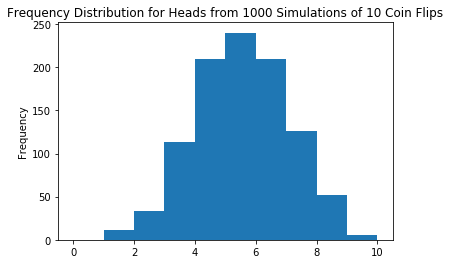

In [5]:
# Plot the data as a histogram and manually set the bin ranges
plot_title = f"Frequency Distribution for Heads from {num_simulations} Simulations of 10 Coin Flips"
freq_dist_df['heads'].plot(kind='hist', title=plot_title, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

### Plot Probability Distribution of Landing on Heads for `n` Number of Simulations of 10 Coin Flips

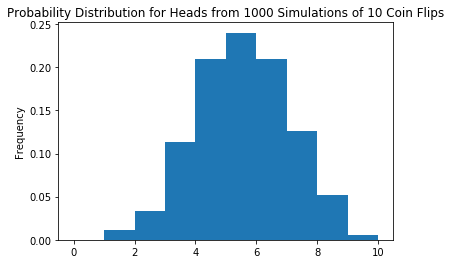

In [6]:
# Plot the data as a histogram with probabilities
plot_title = f"Probability Distribution for Heads from {num_simulations} Simulations of 10 Coin Flips"
freq_dist_df['heads'].plot.hist(density=True, title=plot_title, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

### Create `90%` Confidence Interval via Quantile Range

In [7]:
# Set the 5th and 95th quantiles/percentiles of the frequency distribution
confidence_interval = freq_dist_df['heads'].quantile(q=[0.05, 0.95])
confidence_interval

0.05    3.0
0.95    8.0
Name: heads, dtype: float64

### Plot Lower and Upper Bounds of `90%` Confidence Interval 

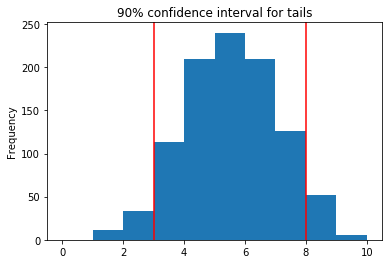

In [8]:
# Import standalone matplotlib library
import matplotlib.pyplot as plt

# Set boundaries for lower and upper bounds of `90%` confidence interval
# Set boundary lines to red
plt.figure()
freq_dist_df['heads'].plot.hist(bins=[0,1,2,3,4,5,6,7,8,9,10], title="90% confidence interval for tails")
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')